In [73]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [76]:
#read csv
data = pd.read_csv('dataset_for_analysis.csv', delimiter=",")

In [77]:
#information about data
data.info()

#There are no missing values (non-null count is equal to the total number of entries for each column).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6125 entries, 0 to 6124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6125 non-null   object 
 1   Bank_ID    6125 non-null   object 
 2   Open       6125 non-null   float64
 3   High       6125 non-null   float64
 4   Low        6125 non-null   float64
 5   Close      6125 non-null   float64
 6   Adj Close  6125 non-null   float64
 7   Volume     6125 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 382.9+ KB


In [78]:
# Converts the 'Date' column in the DataFrame 'data' to datetime format.
data['Date'] = pd.to_datetime(data['Date'])


In [79]:
data.info()
#checking the datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6125 entries, 0 to 6124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6125 non-null   datetime64[ns]
 1   Bank_ID    6125 non-null   object        
 2   Open       6125 non-null   float64       
 3   High       6125 non-null   float64       
 4   Low        6125 non-null   float64       
 5   Close      6125 non-null   float64       
 6   Adj Close  6125 non-null   float64       
 7   Volume     6125 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 382.9+ KB


In [99]:
df = data.copy()
#copying dataframe so we can have backup

df.head()

,Date,Bank_ID,Open,High,Low,Close,Adj Close,Volume
0,2019-04-02,BBCA,5530.0,5570.0,5480.0,5500.0,4896.961426,36853000
1,2019-04-03,BBCA,5500.0,5500.0,5500.0,5500.0,4896.961426,0
2,2019-04-04,BBCA,5540.0,5560.0,5490.0,5540.0,4932.575195,48112000
3,2019-04-05,BBCA,5560.0,5560.0,5525.0,5530.0,4923.671875,21913500
4,2019-04-08,BBCA,5505.0,5540.0,5450.0,5480.0,4879.153809,39910000


In [100]:
# Calculates the 10-period moving average of the 'Close' price.
# It computes the mean of the last 10 closing prices for each row.
df['MA10'] = df['Close'].rolling(10).mean()

# Calculates the 50-period moving average of the 'Close' price.
# It computes the mean of the last 50 closing prices for each row.
df['MA50'] = df['Close'].rolling(50).mean()

In [101]:
df

,Date,Bank_ID,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
0,2019-04-02,BBCA,5530.0,5570.0,5480.0,5500.0,4896.961426,36853000,NaN,NaN
1,2019-04-03,BBCA,5500.0,5500.0,5500.0,5500.0,4896.961426,0,NaN,NaN
2,2019-04-04,BBCA,5540.0,5560.0,5490.0,5540.0,4932.575195,48112000,NaN,NaN
3,2019-04-05,BBCA,5560.0,5560.0,5525.0,5530.0,4923.671875,21913500,NaN,NaN
4,2019-04-08,BBCA,5505.0,5540.0,5450.0,5480.0,4879.153809,39910000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6120,2024-03-22,BRIS,2680.0,2680.0,2620.0,2630.0,2630.000000,20727900,2658.0,2321.4
6121,2024-03-25,BRIS,2680.0,2680.0,2630.0,2660.0,2660.000000,26442400,2676.0,2336.1
6122,2024-03-26,BRIS,2680.0,2680.0,2630.0,2680.0,2680.000000,19794100,2684.0,2350.5
6123,2024-03-27,BRIS,2690.0,2760.0,2670.0,2720.0,2720.000000,56342100,2671.0,2366.2


In [102]:
# Changing NaN with 0
df = df.fillna(0)

# Changing inf with 0
df = df.replace([float('inf'), -float('inf')], 0)

In [103]:
df

,Date,Bank_ID,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
0,2019-04-02,BBCA,5530.0,5570.0,5480.0,5500.0,4896.961426,36853000,0.0,0.0
1,2019-04-03,BBCA,5500.0,5500.0,5500.0,5500.0,4896.961426,0,0.0,0.0
2,2019-04-04,BBCA,5540.0,5560.0,5490.0,5540.0,4932.575195,48112000,0.0,0.0
3,2019-04-05,BBCA,5560.0,5560.0,5525.0,5530.0,4923.671875,21913500,0.0,0.0
4,2019-04-08,BBCA,5505.0,5540.0,5450.0,5480.0,4879.153809,39910000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6120,2024-03-22,BRIS,2680.0,2680.0,2620.0,2630.0,2630.000000,20727900,2658.0,2321.4
6121,2024-03-25,BRIS,2680.0,2680.0,2630.0,2660.0,2660.000000,26442400,2676.0,2336.1
6122,2024-03-26,BRIS,2680.0,2680.0,2630.0,2680.0,2680.000000,19794100,2684.0,2350.5
6123,2024-03-27,BRIS,2690.0,2760.0,2670.0,2720.0,2720.000000,56342100,2671.0,2366.2


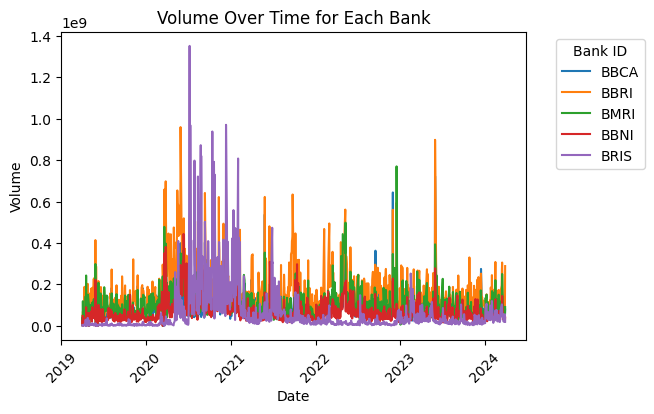

In [104]:
# Plot Volume Over Time for Each Bank
plt.figure(figsize=(6, 4))
sns.lineplot(x='Date', y='Volume', hue='Bank_ID', data=data)
plt.title('Volume Over Time for Each Bank')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Bank ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()


- There was a surge in BRIS stock volume from 2020 to 2021.
- BBRI is the stock with stable sales volume.

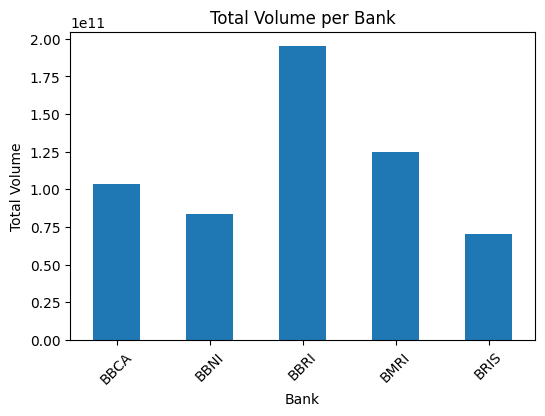

In [105]:
# Plot total Volume per bank
total_volume_per_bank = data.groupby('Bank_ID')['Volume'].sum()

# Plot grafik
plt.figure(figsize=(6, 4))
total_volume_per_bank.plot(kind='bar')
plt.title('Total Volume per Bank')
plt.xlabel('Bank')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)

plt.show()


The order of stocks by volume is as follows:
BBRI, BMRI, BBCA, BBNI, BRIS

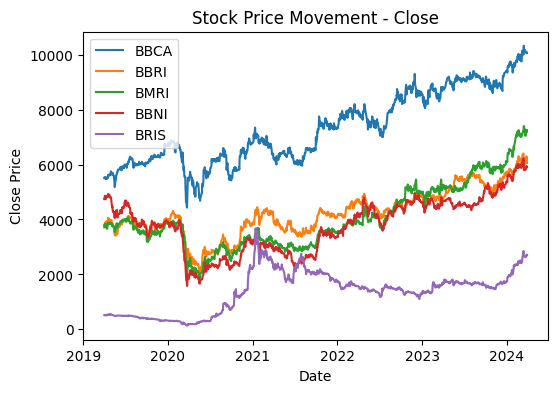

In [106]:
# Plot pergerakan harga saham Close dari semua bank
plt.figure(figsize=(6, 4))
for bank_id in df['Bank_ID'].unique():
    bank_data = df[df['Bank_ID'] == bank_id]
    plt.plot(bank_data['Date'], bank_data['Close'], label=bank_id)

# Tambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Movement - Close')
plt.legend()

# Tampilkan grafik
plt.show()


The highest stock price is held by BBCA, with a tendency to increase from year to year. BMRI, BBRI, and BBNI have similar graphs, with their trends also showing a similar pattern. The bottom graph belongs to BRIS, which experienced an increase from 2020 to 2021 but then declined towards 2022, gradually rising again up to the present.

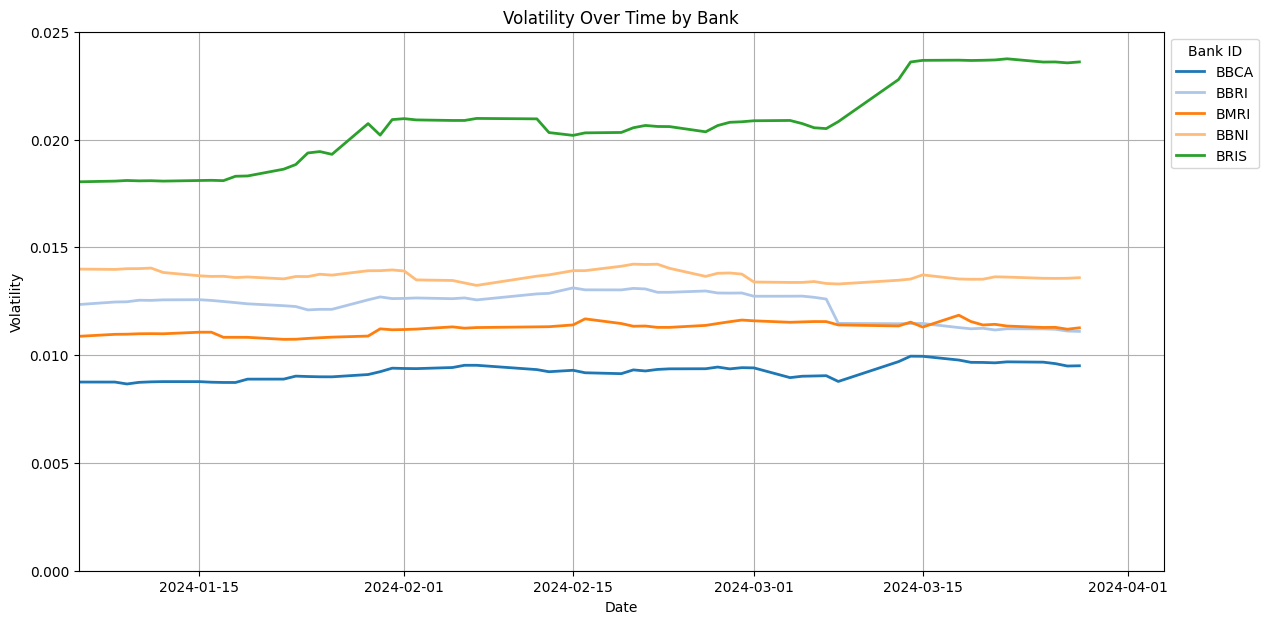

In [107]:
df['Bank_ID'] = df['Bank_ID'].str.strip()

# Calculate daily returns
df['Daily Returns'] = (df['Close'] - df['Open']) / df['Open']

# Calculate volatility
volatility = df.groupby('Bank_ID')['Daily Returns'].rolling(window=90).std().reset_index(level=0, drop=True)

# Get the date three months ago from today
today = datetime.strptime('2024-04-04', '%Y-%m-%d')
three_months_ago = today - timedelta(days=3*30)

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=df['Date'], y=volatility, hue=df['Bank_ID'], palette='tab20', linewidth=2)  # Increased linewidth to 2
plt.title('Volatility Over Time by Bank')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xlim(three_months_ago, today)  # Set x-axis limits to show only the past three months
plt.ylim(0.000, 0.025)  # Set y-axis limits for volatility
plt.legend(title='Bank ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


## Insights from Bank Volatility Data

1. **Relative Volatility Levels**: Comparing the volatility levels among different banks can provide insights into their relative riskiness. For example, BBNI seems to exhibit higher volatility compared to other banks such as BBCA, BBRI, and BMRI. This suggests that investing in BBNI might involve higher risk compared to the other banks.

2. **Volatility Stability**: Observing the stability of volatility over time for each bank can indicate their stock's stability. Banks with consistently low volatility may be perceived as safer investments, while those with fluctuating or increasing volatility may be seen as riskier.

3. **Periods of High Volatility**: Identifying periods of unusually high volatility can highlight times of increased market uncertainty or heightened risk perception. For instance, spikes in volatility around certain dates may coincide with significant market events or announcements affecting the banking sector, such as regulatory changes or economic indicators.

4. **Comparative Analysis**: Conducting a comparative analysis of volatility patterns between different banks can reveal sector-wide trends or idiosyncratic factors affecting individual banks. Understanding the drivers behind these variations can help investors make informed decisions regarding portfolio allocation and risk management.

5. **Correlation and Diversification**: Exploring the correlation between the volatility of different banks can aid in diversification strategies. Banks with low or negatively correlated volatility may offer diversification benefits, as their stock prices may respond differently to market fluctuations.

6. **Event Impact Assessment**: Analyzing how volatility reacts to specific events or news releases can provide insights into market sentiment and investor reactions. For instance, observing whether volatility increases or decreases in response to earnings reports or regulatory announcements can help assess market participants' sentiment towards each bank.

By interpreting these insights, investors and analysts can make more informed decisions regarding portfolio construction, risk management, and market timing within the banking sector.


C:\Users\asus\AppData\Local\Temp\ipykernel_21572\410097679.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = bank_data.resample('M').sum()


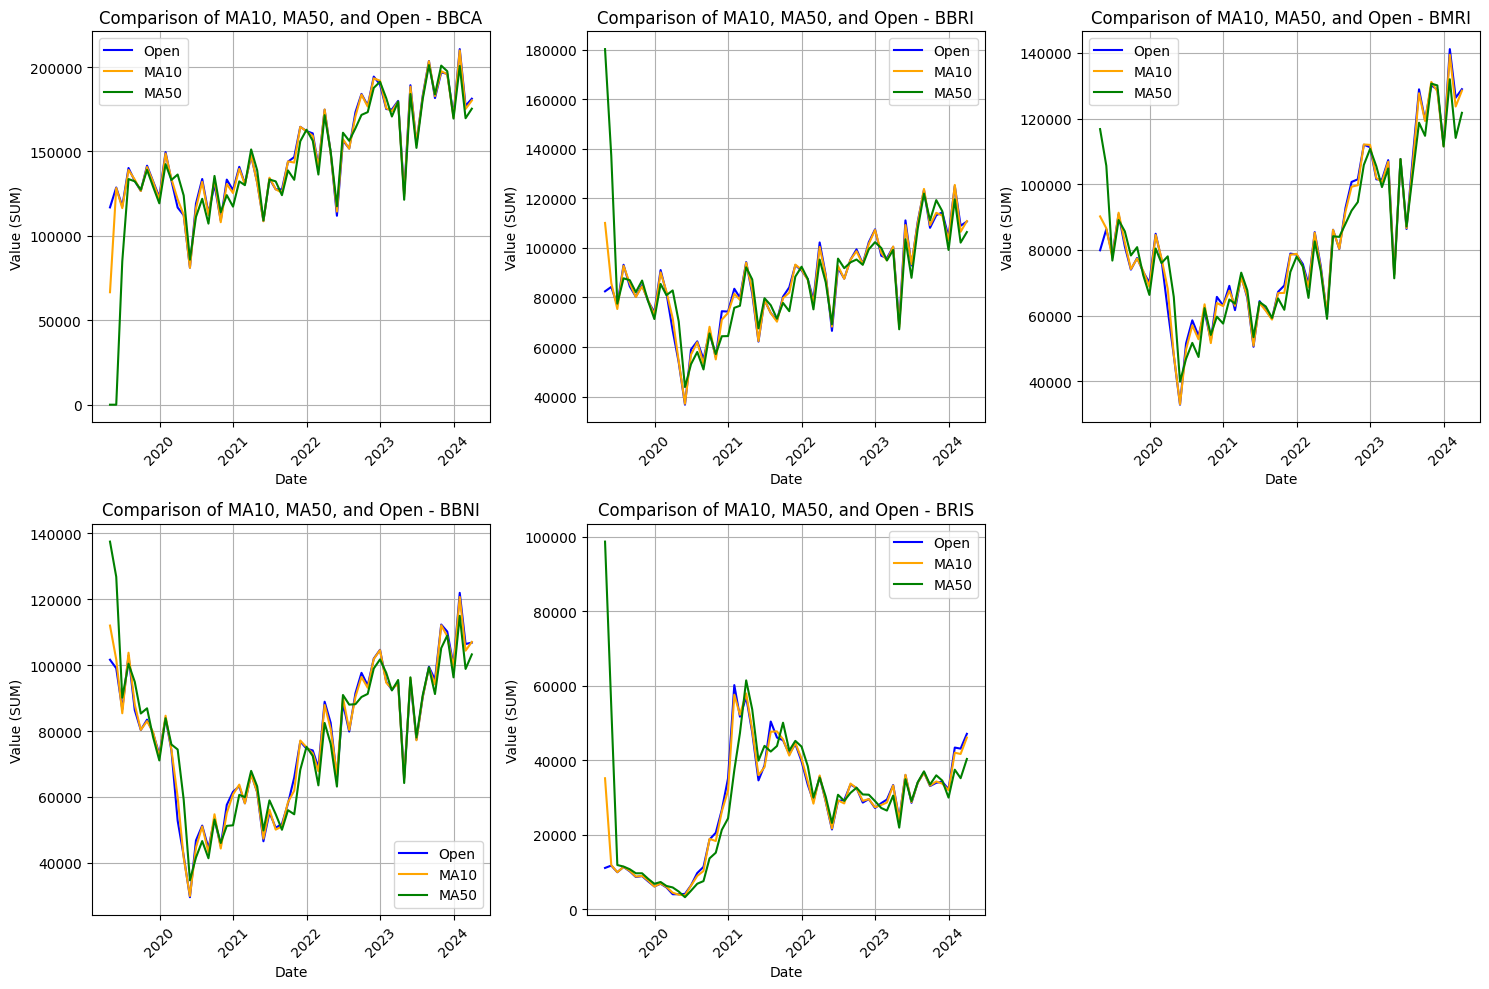

In [109]:
# Set the 'Date' column as index
df.set_index('Date', inplace=True)

# Plotting data for each bank in a single figure
plt.figure(figsize=(15, 10))

# Loop through each bank
for i, bank_id in enumerate(df['Bank_ID'].unique(), 1):
    # Filter data for a specific bank
    bank_data = df[df['Bank_ID'] == bank_id]
    
    # Resample data by month and sum the values
    monthly_data = bank_data.resample('M').sum()

    # Plotting subplot
    plt.subplot(2, 3, i)

    # Plot the stock price at Open
    plt.plot(monthly_data.index, monthly_data['Open'], label='Open', color='blue')

    # Plot the moving average 10
    plt.plot(monthly_data.index, monthly_data['MA10'], label='MA10', color='orange')

    # Plot the moving average 50
    plt.plot(monthly_data.index, monthly_data['MA50'], label='MA50', color='green')

    # Add axis labels and title
    plt.xlabel('Date')
    plt.ylabel('Value (SUM)')
    plt.title(f'Comparison of MA10, MA50, and Open - {bank_id}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

# Show the figure
plt.tight_layout()
plt.show()


## Insights from Comparison MA10, MA50 and Open

Interpretation comparison between Moving Average 10 (MA10), Moving Average 50 (MA50), and the open price can provide insights into both short-term and long-term trends in stock prices. Here are some possible interpretations:

1. **Short-Term Trend (MA10):** MA10 represents the average closing price over the last 10 periods. If MA10 is above the open price, it could indicate an ongoing upward trend or the potential reversal of a downtrend to an uptrend.

2. **Long-Term Trend (MA50):** MA50 represents the average closing price over the last 50 periods. If MA50 is above the open price, it could indicate a positive long-term trend or confirmation of an ongoing upward trend.

3. **Difference between MA10 and MA50:** If MA10 is moving above MA50, it is often considered a bullish (upward) signal that the stock price trend may continue or increase. Conversely, if MA10 is moving below MA50, it could be a bearish (downward) signal that the stock price may decline or continue to decrease.

By comparing these three indicators, investors can gain a better understanding of how stock prices move over a specific period, as well as insights into possible upcoming trends. However, it's important to remember that technical analysis like this is just one aspect of investment decision-making, and additional information such as fundamental analysis and market risk also need to be considered.

BBCA (Bank Central Asia):
- The open price fluctuates significantly over time.
- There is a smoother pattern in the MA10 and MA50, with both following the general trend of the stock price.
- The stock price trend tends to be positive during certain periods, especially around mid-2020 to early 2022.

BBRI (Bank Rakyat Indonesia):
- The open price tends to be more stable compared to BBCA.
- MA10 and MA50 show similar patterns, both fluctuating around the open price.
- There are several periods of significant stock price declines in mid-2020 and mid-2022.

BMRI (Bank Mandiri Indonesia):
- The Open price shows moderate fluctuations over time, with some periods of volatility.
- Both MA10 and MA50 display patterns that closely track the movements of the Open price.
- There are instances of significant fluctuations in the stock price, particularly around mid-2020 and late 2021.

BBNI (Bank Negara Indonesia):
- The Open price exhibits noticeable fluctuations throughout the observed period.
- Both MA10 and MA50 show similar trends, closely following the movements of the Open price.
- There are periods of significant volatility in the stock price, notably around mid-2020 and late 2021.

BRIS (Bank Rakyat Indonesia Syariah):
- The Open price shows significant fluctuations, especially at the beginning of the observation period.
- MA10 and MA50 closely follow the trend of the Open price, although there are some differences observed throughout the period.
- There are periods of significant stock price fluctuations, particularly in early 2020 and mid-2021.

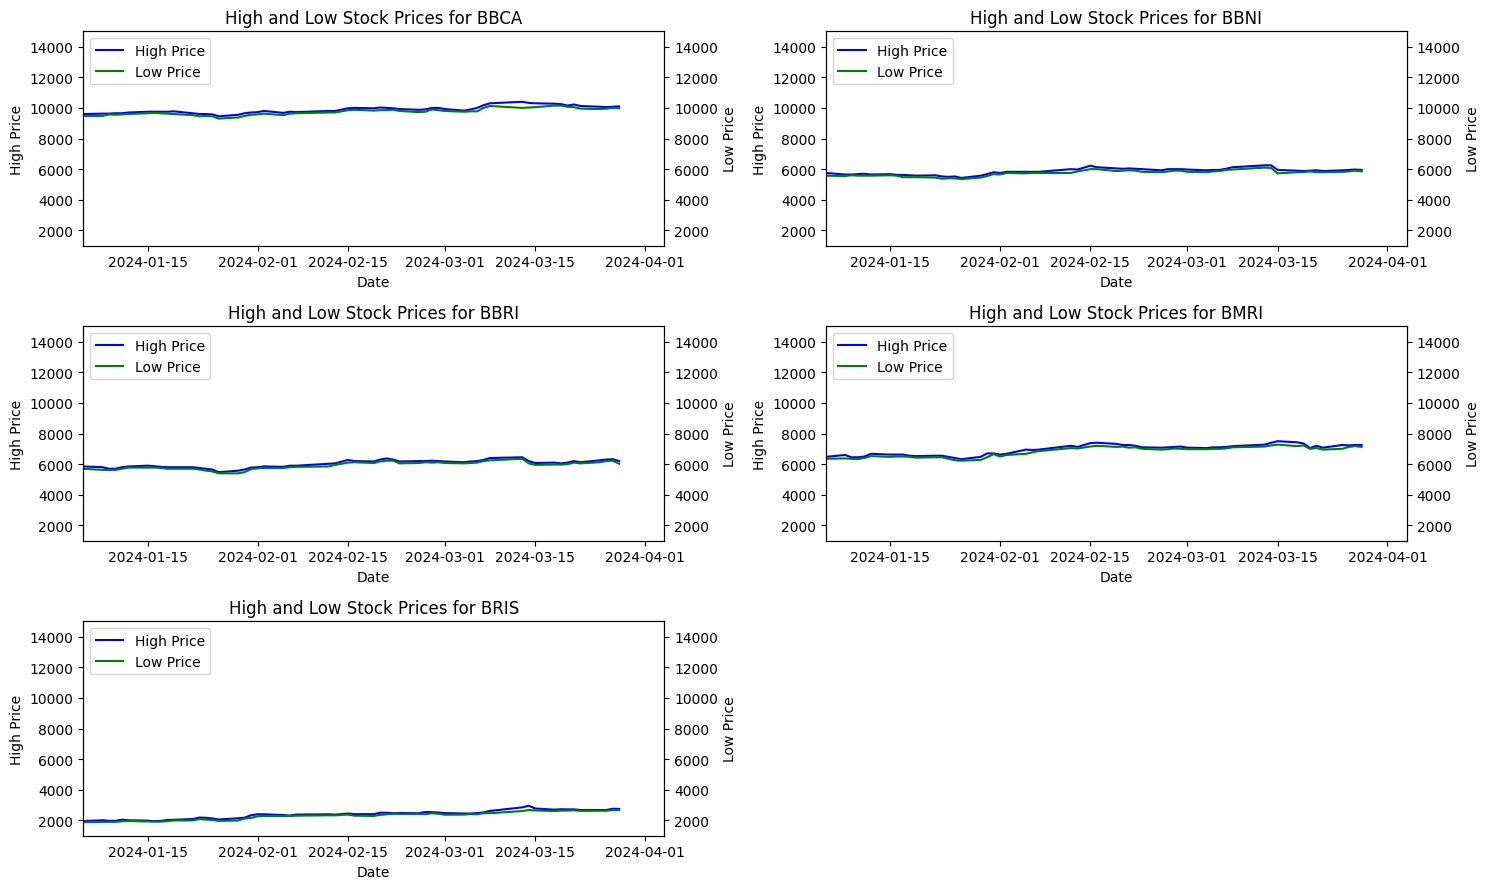

In [120]:
# Calculate the number of rows and columns needed based on the number of unique Bank_IDs
num_banks = len(df['Bank_ID'].unique())
num_rows = (num_banks + 1) // 2  # Add 1 and then integer divide by 2 to round up
num_cols = 2

# Create a single plot for all Bank_IDs with two columns and smaller size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3*num_rows))  # Adjust the figsize as needed

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Loop through each Bank_ID
for i, (bank_id, group_data) in enumerate(df.groupby('Bank_ID')):
    ax1 = axes[i]
    ax2 = ax1.twinx()  # Create a secondary y-axis for each Bank_ID
    
    high_price_line, = ax1.plot(group_data.index, group_data['High'], color='blue', label='High Price')
    low_price_line, = ax2.plot(group_data.index, group_data['Low'], color='green', label='Low Price')
    
    # Get the date three months ago from today
    today = datetime.strptime('2024-04-04', '%Y-%m-%d')
    three_months_ago = today - timedelta(days=3*30)
    
    ax1.set_ylabel('High Price')
    ax2.set_ylabel('Low Price')
    ax1.set_xlabel('Date')
    
    ax1.set_ylim(1000, 15000)  # Set y-axis limits for High Price
    ax2.set_ylim(1000, 15000)  # Set y-axis limits for Low Price
    
    # Merge legend handles and labels
    handles, labels = [], []
    handles.extend([high_price_line, low_price_line])
    labels.extend(['High Price', 'Low Price'])
    
    # Plot a single legend
    ax1.legend(handles, labels, loc='upper left')
    
    ax1.set_title(f'High and Low Stock Prices for {bank_id}')
    ax1.set_xlim(three_months_ago, today)  # Set x-axis limits to show only the past three months

# Hide any unused subplots
for i in range(num_banks, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### Bank Price Analysis for the Past Three Months

#### BBCA (PT Bank Central Asia Tbk)
- **Lowest Low Price:** 9300.0
- **Highest High Price:** 10150.0
- **Price Range:** 850.0
- **Insights:**
  - The stock experienced fluctuations but generally trended upwards.
  - Significant volatility in mid-February to early March.

#### BBRI (PT Bank Rakyat Indonesia Tbk)
- **Lowest Low Price:** 5400.0
- **Highest High Price:** 7400.0
- **Price Range:** 2000.0
- **Insights:**
  - More volatility compared to BBCA.
  - A sharp increase in mid-February, followed by some volatility.

#### BMRI (PT Bank Mandiri Tbk)
- **Lowest Low Price:** 5350.0
- **Highest High Price:** 7400.0
- **Price Range:** 2050.0
- **Insights:**
  - Similar to BBRI, experienced considerable volatility.
  - Relatively stable until mid-February, then significant fluctuations.

#### BBNI (PT Bank Negara Indonesia Tbk)
- **Lowest Low Price:** 5375.0
- **Highest High Price:** 6100.0
- **Price Range:** 725.0
- **Insights:**
  - Experienced fluctuations but generally trended upwards.
  - Some volatility in mid-February to early March.

#### BRIS (PT Bank Rakyat Indonesia Syariah Tbk)
- **Lowest Low Price:** 1900.0
- **Highest High Price:** 2850.0
- **Price Range:** 950.0
- **Insights:**
  - Experienced significant volatility throughout the period.
  - Sharply increased in mid-February, followed by fluctuations.

### Insights:
- Overall, the banking sector experienced volatility, with some banks showing more stability than others.
- Mid-February was a period of notable activity, with several banks experiencing significant price movements.
- Investors may need to closely monitor these stocks, especially considering the volatility observed in the recent past.
- Economic and financial factors, as well as industry-specific news, could influence future price movements in these banks.
